# Analyse ITI Gaussian Fidelity Test Results

In this notebook we analyse the results of the ITI fidelity tests using synthetic Gaussian data.

In [1]:
# Neccessary imports
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import pandas as pd

In [2]:
# Load the pickle containing the results dataframe
fit_results_filename = "testcat_fit.pkl"
df = pd.read_pickle(fit_results_filename)
df.head()

,amp_cat,x0_cat,y0_cat,sig_x_cat,sig_y_cat,pa_cat,amp_fit,x0_fit,y0_fit,sig_x_fit,sig_y_fit,pa_fit
0,36.035037,181.53510,190.74664,34.977293,33.109630,30.310967,37.928820,182.666641,191.225866,31.565716,33.574684,125.712967
1,26.270885,217.24964,607.48520,36.167368,16.583185,1.696422,26.040729,218.289190,608.358368,35.999214,15.721587,3.270587
2,48.324686,183.46154,1012.93350,35.126599,33.786781,113.808686,47.545418,184.723481,1012.906809,35.434689,34.235482,70.343177
3,24.672998,191.24482,1416.16920,21.422706,17.741147,175.382940,23.598483,190.393212,1415.224566,24.403630,17.215853,178.302220
4,49.771961,181.67766,1793.73280,34.449510,14.384797,30.582986,51.342637,181.950522,1793.802489,34.277038,14.724030,29.729004


Text(0.5, 1.0, 'Amplitude Comparison')

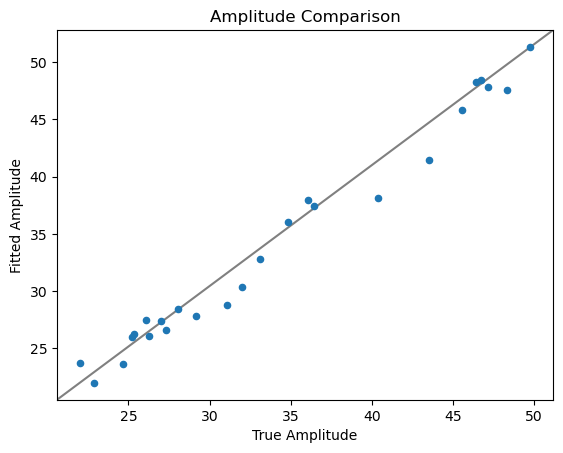

In [3]:
# Plot the amplitude
ax = df.plot.scatter(x="amp_cat", y="amp_fit", zorder=2)
ax.plot([0, 1], [0, 1], color='grey', transform=ax.transAxes, zorder=1)
ax.set_xlabel("True Amplitude")
ax.set_ylabel("Fitted Amplitude")
ax.set_title("Amplitude Comparison")

Text(0.5, 1.0, 'Position Angle Comparison')

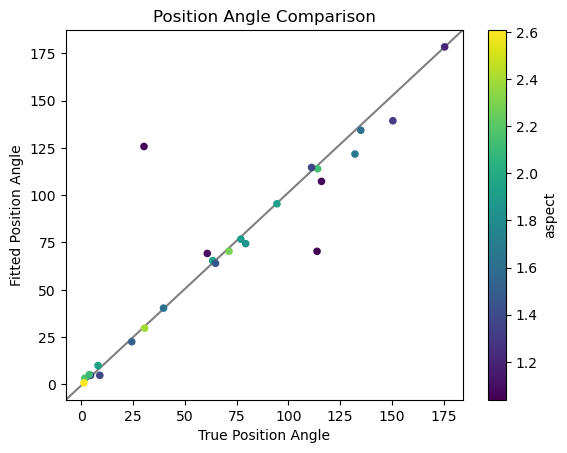

In [4]:
# Add an aspect column
df["aspect"] = df["sig_x_cat"] / df["sig_y_cat"]

# Plot the PA, coloured by aspect ratio
ax = df.plot.scatter(x="pa_cat", y="pa_fit", c="aspect", zorder=2)
ax.plot([0, 1], [0, 1], color='grey', transform=ax.transAxes, zorder=1)
ax.set_xlabel("True Position Angle")
ax.set_ylabel("Fitted Position Angle")
ax.set_title("Position Angle Comparison")

Text(0.5, 1.0, 'Position Offset')

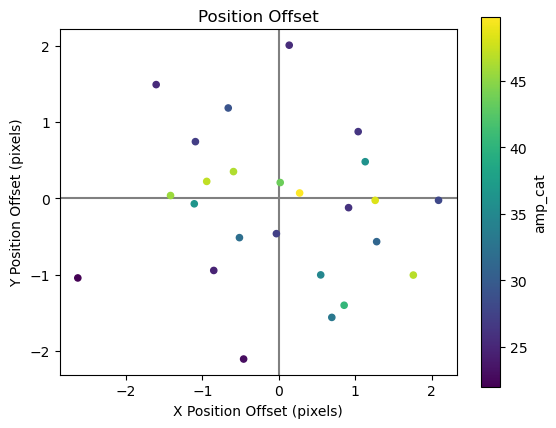

In [5]:
# Add offset columns
df["x_off"] = df["x0_fit"] - df["x0_cat"]
df["y_off"] = df["y0_fit"] - df["y0_cat"]

# Plot the X-Y position offsets
ax = df.plot.scatter(x="x_off", y="y_off", c="amp_cat", zorder=2)
ax.set_aspect('equal')
ax.axvline(x=0, color="grey", zorder=1)
ax.axhline(y=0, color="grey", zorder=1)
ax.set_xlabel("X Position Offset (pixels)")
ax.set_ylabel("Y Position Offset (pixels)")
ax.set_title("Position Offset")

Text(0.5, 1.0, 'Size Comparison')

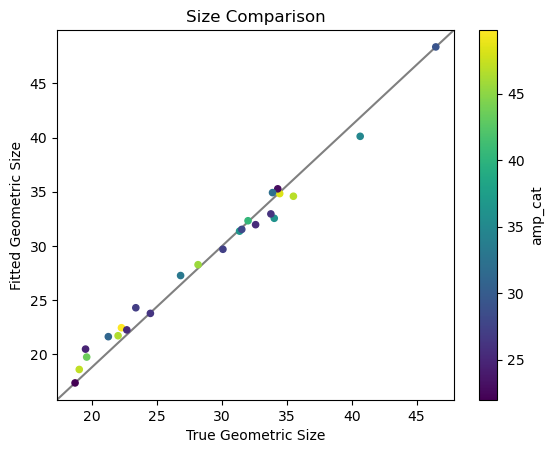

In [6]:
# Add geometric mean size columns
df["size_cat"] = (df["sig_x_cat"] * df["sig_y_cat"])**0.5
df["size_fit"] = (df["sig_x_fit"] * df["sig_y_fit"])**0.5

# Plot the size coloured by amplitude
ax = df.plot.scatter(x="size_cat", y="size_fit", c="amp_cat", zorder=2)
ax.plot([0, 1], [0, 1], color='grey', transform=ax.transAxes, zorder=1)
ax.set_xlabel("True Geometric Size")
ax.set_ylabel("Fitted Geometric Size")
ax.set_title("Size Comparison")

Text(0.5, 1.0, 'X Size Comparison')

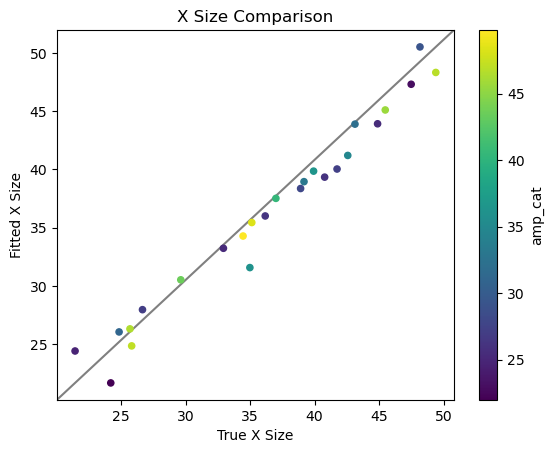

In [7]:
# Plot the X-size coloured by amplitude
ax = df.plot.scatter(x="sig_x_cat", y="sig_x_fit", c="amp_cat", zorder=2)
ax.plot([0, 1], [0, 1], color='grey', transform=ax.transAxes, zorder=1)
ax.set_xlabel("True X Size")
ax.set_ylabel("Fitted X Size")
ax.set_title("X Size Comparison")

Text(0.5, 1.0, 'Y Size Comparison')

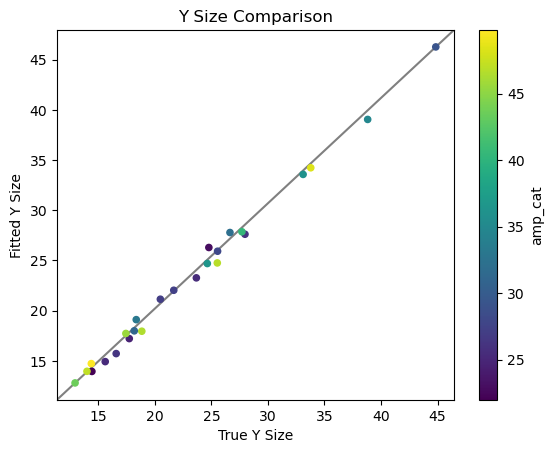

In [9]:
# Plot the Y-size coloured by amplitude
ax = df.plot.scatter(x="sig_y_cat", y="sig_y_fit", c="amp_cat", zorder=2)
ax.plot([0, 1], [0, 1], color='grey', transform=ax.transAxes, zorder=1)
ax.set_xlabel("True Y Size")
ax.set_ylabel("Fitted Y Size")
ax.set_title("Y Size Comparison")